# Part I - (Exploratory Data Analysis of GoFordBike-System Dataset)
## by (Emmanuel Olorunbogun)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.It consists of information about trips taken by service's members during february 2019.

### Using the Requests library to download the GoFordBike-System Dataset

In [442]:
# Importing the request libary
import requests

# Using the request library to download the fordgobike-tripdata.csv file programmatically
url = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'
response = requests.get(url)

# writing it to file
with open('201902-fordgobike-tripdata.csv', 'wb') as f:
    f.write(response.content)

In [443]:
# importing the necessary packages and setting the plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [444]:
# reading the csv file into a DataFrame
df = pd.read_csv('201902-fordgobike-tripdata.csv')


## Preliminary Wrangling

### Assessing the Dataset
>Here we'll be assessing the data for its general properties to get a better understanding of it. To do this, we'll be checking for the:
- first five rows of the dataset
- shape of the data
- data type of the columns
- descriptive statistics of the columns
- columns containing missing values
- duplicates in the dataset
- Total number of columns with null values

In [445]:
# Checking the first five rows of the dataset
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [446]:
# Checking the shape of the dataset - Number of rows & columns.
df.shape

(183412, 16)

In [447]:
# Checking for the datatype of the column
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [448]:
# Assessing column names, their datatype & number of non-null values per column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [449]:
# Descriptive Statistics of the Dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [450]:
# Checking for duplicates in the Dataset
df.duplicated().sum()

0

In [451]:
df.isna().any().sum()

6

In [452]:
# Checking for the unique birth year of members
df['member_birth_year'].unique()

array([1984.,   nan, 1972., 1989., 1974., 1959., 1983., 1988., 1992.,
       1996., 1993., 1990., 1981., 1975., 1978., 1991., 1997., 1986.,
       2000., 1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967.,
       1998., 1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964.,
       1965., 1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970.,
       1956., 1957., 1945., 1900., 1952., 1948., 1951., 1941., 1950.,
       1949., 1953., 1955., 1946., 1947., 1931., 1943., 1942., 1920.,
       1933., 2001., 1878., 1901., 1944., 1928., 1934., 1939., 1930.,
       1902., 1910., 1938., 1927.])

### What is the structure of your dataset?

>This dataset contains about 183,412 rows and 16 columns and below are the descriptions for each column.
#### Column Description:
**`duration_sec`**: contains the trip duration in seconds.
<br>**`start_time`** : the start time of the ride.</br>
<br>**`end_time`** : the end time of ride.</br>
<br>**`start_station_id`** : id to identify the station where the ride started.</br>
<br>**`start_station_name`** : name of the start station.</br>
<br>**`start_station_latitude`** : latitude of the start station.</br>
<br>**`start_station_longitude`** : longitude of the start station.</br>
<br>**`end_station_id`** : id to identify the station where the ride ended. </br>
<br>**`end_station_name`** : name of the end station.</br>
<br>**`end_station_latitude`** : latitude of the end station.</br>
<br>**`end_station_longitude`** : longitude of the end station.</br>
<br>**`bike_id`** : id to identify each bike.</br>
<br>**`user_type`** : shows if the user has subscription or not.</br>
<br>**`member_birth_year`** : year of birth of the user.</br>
<br>**`member_gender`** : gender of the user.</br>
<br>**`bike_share_for_all_trip`**</br>

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in this dataset is the **`duration_sec`**.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some of the user's information such as the **`user_type`**, **`member_gender`** and **`member_birth_year`** will be important for further investigation on the feature of interest.

#### Quality Issues:
<br>1. Convert the **duration_sec** to minutes.</br>
<br>2. The **start_time** and **end_time** columns should be in a timestamp format not as an object.</br>
<br>3. The day of the week column can be added to the dataset using the **start_time**.</br>
<br>4. The hour of the day can be calculated into a new column using the **start_time**.</br>
<br>5. The **member_birth_year** contains some null values.</br>
<br>6. The datatype of **member_birth_year** is float instead of integer.</br>
<br>7. The age of the members can be calculated into a new column using the **member_birth_year**.</br>
<br>8. The **member_gender** column contains some null values.</br>
<br>9. Convert **bike_id** column to object and **user_type**, **member_gender** and **bike_share_for_all_trip** columns to category datatype.</br>
<br>10. The dataset contains some unwanted columns.</br>

## Data Cleaning

In [453]:
# Create a copy of the dataset
df_clean = df.copy()

### Issue #1: Convert duration_sec to minutes

#### Define: 
- The **duration_sec** can be converted to minutes by dividing it by 60. This will be used to create a new column called **duration_min** and it will be converted into an integer.

#### Code

In [454]:
df_clean['duration_min']  = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype('int')

#### Test

In [455]:
# Checking for the column
df_clean[['duration_sec', 'duration_min']].head()

,duration_sec,duration_min
0,52185,869
1,42521,708
2,61854,1030
3,36490,608
4,1585,26


### Issue #2: The *start_time* and *end_time* columns should be in a timestamp format not as an object

#### Define: 
- The pd.datetime() function of the pandas library is used to convert both columns to datetime.

#### Code

In [456]:
# Converting both columns to a datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['start_time'])

#### Test

In [457]:
# Checking for the datatype of both columns
df_clean[['start_time', 'end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

### Issue #3: The day of the week column can be added to the dataset using the start_time

#### Define:
- This can be done using the dt.strftime() function to convert a specified date_format into formatted strings.

#### Code:


In [461]:
# Creating a new column using the dt.strftime() on the start_time column
df_clean['Day_of_week'] = df_clean['start_time'].dt.strftime('%a')

#### Test:

In [462]:
# Checking for random values in the new column
df_clean['Day_of_week'].sample(5)

181264    Fri
60815     Wed
145763    Thu
132061    Sat
129999    Sat
Name: Day_of_week, dtype: object

### Issue #4: The hour of the day can be calculated into a new column using the start_time column

#### Define:
- The dt.strftime() function will also be used for this.

#### Code:

In [463]:
df_clean['time'] = df_clean['start_time'].dt.strftime('%H')

#### Test:

In [464]:
# Checking for 5 random samples from the new time column
df_clean['time'].sample(5)

77997     21
147101    08
133298    19
76515     08
26761     11
Name: time, dtype: object

### Issue #5: There are null values in the member_birth_year column

#### Define:
- The null values in the column will be filled using the fillna() function.

#### Code:

In [465]:
# Fill the missing values with the mean
df_clean['member_birth_year'].fillna(df_clean['member_birth_year'].mean(), inplace=True)

#### Test:

In [466]:
# Counting the number of null values in the column
df_clean['member_birth_year'].isna().sum()

0

### Issue #6: The datatype of *member_birth_year* is float instead of integer.

### Define:
- The datatype of the column will be converted into an integer using the astype() function.

#### Code:

In [467]:
# Convert the datatype of the column to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int')

#### Test:

In [468]:
# Checking for the datatype of the column after conversion
df_clean['member_birth_year'].dtype

dtype('int32')

### Issue 7: The age of the members can be calculated into a new column using the member_birth_year

#### Define:
- This can be done by subtracting the *member_birth_year* from the year which the data was collected (2019).

#### Code:

In [469]:
df_clean['age'] = 2019 - df_clean['member_birth_year']

#### Test:

In [470]:
# Checking for random values from the the new column
df_clean['age'].sample(5)

113856    27
154354    24
108276    35
91297     24
22824     26
Name: age, dtype: int32

### Issue 8: The *member_gender* column contains some null values.

#### Define:
- The null values in the column will be dropped.

#### Code:

In [471]:
df_clean = df_clean.dropna(subset=['member_gender'])

#### Test:

In [472]:
df_clean['member_gender'].isna().sum()

0

### Issue #9: Convert **bike_id** column to object and **user_type**, **member_gender** and **bike_share_for_all_trip** columns to category datatype.

#### Define:
- The pandas astype() function will be used to convert these columns

#### Code:

In [473]:
# Converting the datatype of bike_id to object
df_clean = df_clean.astype({'bike_id' : 'str'})

In [474]:
# Converting the datatype of the user_type, member_type and bike_share_for_all_trip to object
df_clean = df_clean.astype({'user_type':'category', 'member_gender':'category', 'bike_share_for_all_trip':'category'})

#### Test:

In [475]:
# Checking the datatype of the columns
df_clean[['bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip']].dtypes

bike_id                      object
user_type                  category
member_gender              category
bike_share_for_all_trip    category
dtype: object

### Issue #10: The dataset contains some unwanted columns.

#### Define:
- The unwanted columns will be dropped.

#### Code:

In [476]:
# Dropping the columns
df_clean = df_clean.drop(['duration_sec', 'start_time', 'end_time', 
                          'start_station_id', 'start_station_name',
                          'start_station_longitude', 'start_station_latitude',
                          'end_station_id', 'end_station_name', 'end_station_longitude',
                          'end_station_latitude', 'member_birth_year'], axis=1)

#### Test:

In [477]:
# Checking the columns in the dataset
df_clean.columns

Index(['bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip',
       'duration_min', 'Day_of_week', 'time', 'age'],
      dtype='object')

In [478]:
# Checking the information of the new dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   bike_id                  175147 non-null  object  
 1   user_type                175147 non-null  category
 2   member_gender            175147 non-null  category
 3   bike_share_for_all_trip  175147 non-null  category
 4   duration_min             175147 non-null  int32   
 5   Day_of_week              175147 non-null  object  
 6   time                     175147 non-null  object  
 7   age                      175147 non-null  int32   
dtypes: category(3), int32(2), object(3)
memory usage: 7.2+ MB


## Storing Data
The cleaned dataset is saved to a CSV file named "go_fordbike19_clean.csv".

In [479]:
# Saving and storing the merged data into as a csv
df_clean.to_csv("go_fordbike19_clean.csv", index=False)

## Loading the Saved Data
The saved dataset is loaded into a dataframe called "bike_data"

In [480]:
# Loading the stored csv file for further exploration
bike_data = pd.read_csv('go_fordbike19_clean.csv')

In [481]:
# Checking the first five rows of the dataset
bike_data.head()

,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,Day_of_week,time,age
0,4902,Customer,Male,No,869,Thu,17,35
1,5905,Customer,Male,No,1030,Thu,12,47
2,6638,Subscriber,Other,No,608,Thu,17,30
3,4898,Subscriber,Male,Yes,26,Thu,23,45
4,5200,Subscriber,Male,No,29,Thu,23,60


In [482]:
# Checking for the column information
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175147 entries, 0 to 175146
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   bike_id                  175147 non-null  int64 
 1   user_type                175147 non-null  object
 2   member_gender            175147 non-null  object
 3   bike_share_for_all_trip  175147 non-null  object
 4   duration_min             175147 non-null  int64 
 5   Day_of_week              175147 non-null  object
 6   time                     175147 non-null  int64 
 7   age                      175147 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 10.7+ MB


## Univariate Exploration
> **In this section, we'll investigate distributions of individual variables.**

### Question 1: What age group had the highest number of trips taken?

In [483]:
bike_data['age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [484]:
rider_age = bike_data.query('age < age.quantile(0.99)')
rider_age['age'].describe()

count    173333.000000
mean         33.802005
std           9.342947
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          63.000000
Name: age, dtype: float64

- The youngest rider was 18 years old.
- It can be observed that 75% of the riders were below the age of 39.
- Further investigation shows that 99% of the riders were below the age of 63.
- So there is presence of outliers in the age column.

#### Visualization

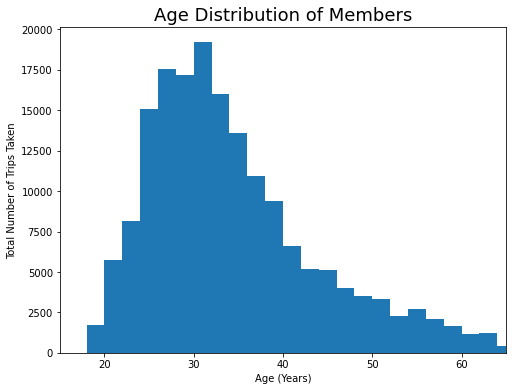

In [485]:
# Setting the bins
bins = np.arange(18, bike_data['age'].max()+2, 2)

# Setting the size of the figure
plt.figure(figsize=[8, 6])

# Plotting the histogram
plt.hist(data=bike_data, x = 'age', bins=bins)
plt.xlim((15,65))
plt.xlabel('Age (Years)')
plt.ylabel('Total Number of Trips Taken')
plt.title('Age Distribution of Members', fontsize = 18);

#### Observation:
- Members between the age bracket of 25 and 40 had the highest number of trips taken.

### Question 2: Which gender takes more of the bike trips?

In [486]:
# Counting the number of rides by gender
gender_count = bike_data['member_gender'].value_counts()
gender_count

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

#### Visualization

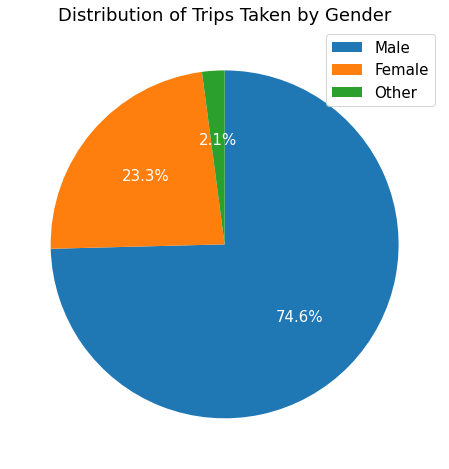

In [488]:
# Setting the size of the figure
plt.figure(figsize=[12, 8])

# Plotting the Pie Chart showing the distribution of trips taken by Gender
plt.pie(gender_count, labels = gender_count.index, startangle = 90,
       autopct= '%1.1f%%', counterclock = False, textprops={'color':'white', 'size':15})
plt.legend(loc='upper right', fontsize = 15)
plt.title('Distribution of Trips Taken by Gender', fontsize = 18);

### Observation:
- Men have the highest number of bike trips taken with about 75% of the total trips.

### Question 3: What proportion of the users take bike trip the most?

In [489]:
# Counting the unique values in the user_type column
user_count = bike_data['user_type'].value_counts()

# Calculating the total number of user
total_user = bike_data['user_type'].value_counts().sum()

# Getting the category with highest frequency
max_count = user_count[0]

# Computing the length of the longest bar in terms of proportion
max_prop = max_count/total_user

#### Visualization

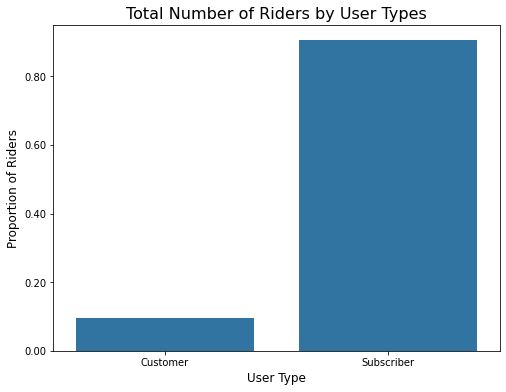

In [518]:
# Creating an array of evenly spaced proportional values
tick_props = np.arange(0, max_prop, 0.2)

# Setting the ticknames
tick_names = ['{:0.2f}'.format(x) for x in tick_props]

# Setting the color
base_color = sb.color_palette()[0]

# Setting the size of the figure
plt.figure(figsize=[8,6])

# Plotting the bar Chart
sb.countplot(data=bike_data, x='user_type', color=base_color)
plt.yticks(tick_props * total_user, tick_names)
plt.title('Total Number of Riders by User Types', fontsize=16)
plt.xlabel('User Type', fontsize = 12)
plt.ylabel('Proportion of Riders', fontsize = 12);

### Observation:
- The subscribers are the the users with the most number of trips taken contributing about 90% of the total trips.

### Question 4: What hour of the day records the highest number of rides?

In [491]:
# Ordering the time column 
hour_order = bike_data['time'].value_counts().index.sort_values()
hour_order

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

### Visualization

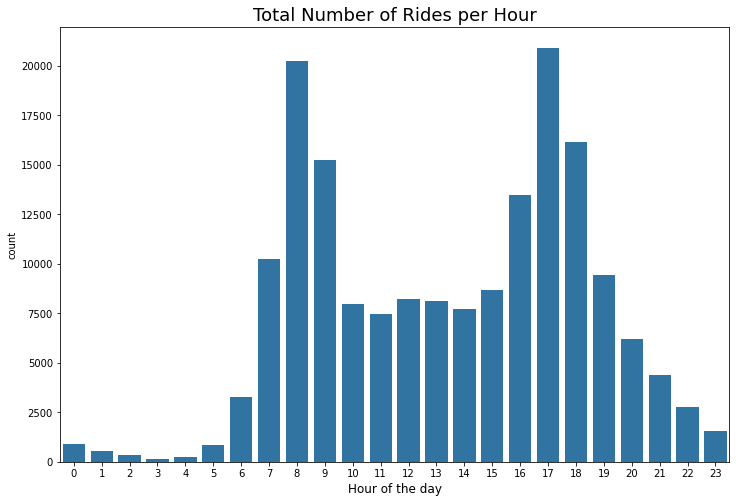

In [492]:
# Setting the size of the figure
plt.figure(figsize=[12,8])

# Plotting the bar chart with seaborn
sb.countplot(data = bike_data, x = 'time', color = base_color, order = hour_order)
plt.xlabel('Hour of the day', fontsize = 12)
plt.title('Total Number of Rides per Hour', fontsize = 18);

### Observation:
- It can be observed that the distribution is bi-modal.
- **8AM** and **5PM** are the two hours where most of the rides occur.

### Question 5: Which day of the week has the highest number of trips?

### Visualization

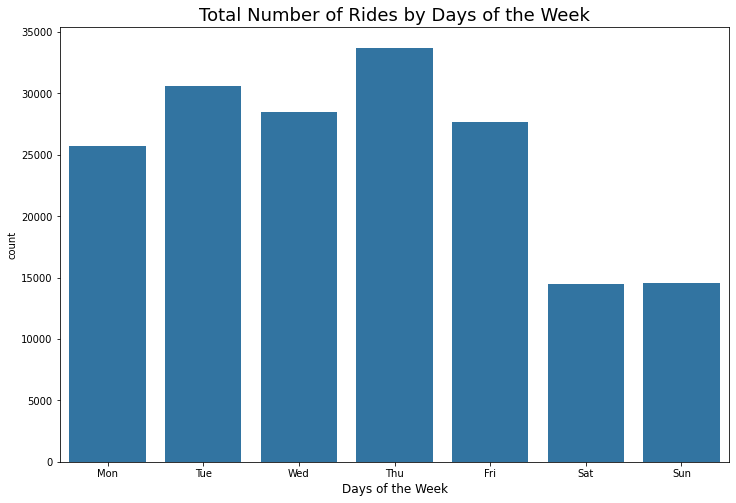

In [494]:
# Ordering the days of the week
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Setting the size of the figure
plt.figure(figsize=[12,8])

# Plotting the bar chart with seaborn
sb.countplot(data = bike_data, x = 'Day_of_week', color = base_color, order = day_order)
plt.xlabel('Days of the Week', fontsize = 12)
plt.title('Total Number of Rides by Days of the Week', fontsize = 18);

### Observation:
- **Thursday** is the day with the highest number of trips.
- Saturday and Sunday have the lowest number of trips.

### Question 6: What is the duration(mins) of the highest number of trips?

In [495]:
# Descriptive statistics of the duration_min
bike_data['duration_min'].describe()

count    175147.000000
mean         11.244971
std          27.361348
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

In [496]:
# Checking for the distribution of 99 percent of duration minutes
duration = bike_data.query('duration_min < duration_min.quantile(0.99)')
duration['duration_min'].describe()

count    173332.00000
mean          9.70808
std           7.06222
min           1.00000
25%           5.00000
50%           8.00000
75%          12.00000
max          51.00000
Name: duration_min, dtype: float64

### Visualization

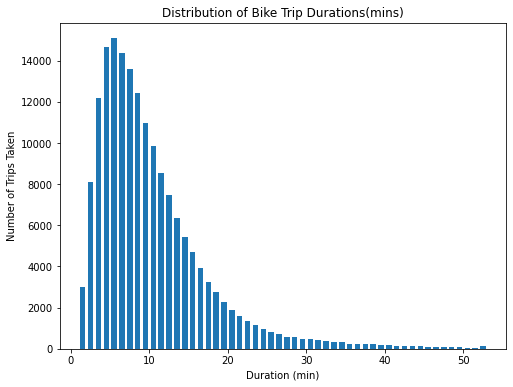

In [497]:
bins = np.arange(1,53+1,1)
plt.figure(figsize=[8, 6])
plt.hist(data=bike_data, x='duration_min',bins=bins, rwidth=0.7)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips Taken')
plt.title("Distribution of Bike Trip Durations (mins)");

### Observation:
- The modal duration for most bike trips is between **5** to **12.5** minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> <br>1. The age of riders and duration of trip taken were quite interesting to explore.</br> 
> <br>2. They both contained outliers.</br>
> <br> 3. The hour of the day the the higest number of rides were 8AM and 5PM. The former could be assumed to be the resumption time for rider at their workplac while the later is the closing time.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> To tidy up these outliers, the age and duration of trips that captures 99% of the users were used the for investigation.
> This was done by using the summary statistics of both variables to map out the needed data and to eliminate the extreme outliers.

## Bivariate Exploration
> **In this section, we'll investigate how the variation of one variable will affect another one.**

### Question 1: How is the usage of bike by Users on Days of the Week?

### Visualization

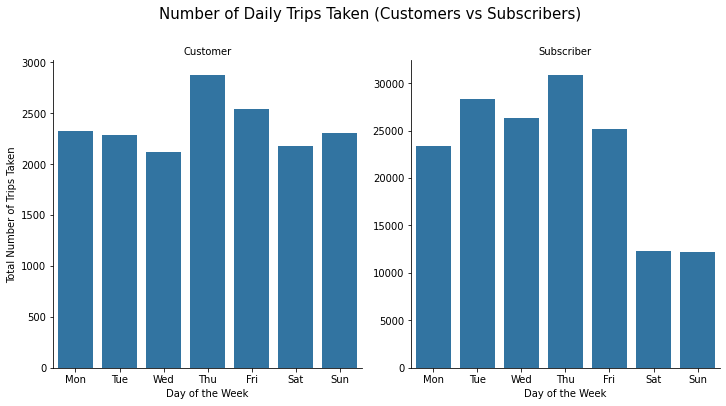

In [502]:
# Setting the order of the weekdays
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Plotting the chart
day_plot = sb.catplot(data = bike_data, x = 'Day_of_week', col = 'user_type', color = base_color,
                       order = day_order, sharey = False, kind ='count')

day_plot.set_axis_labels('Day of the Week','Total Number of Trips Taken')
day_plot.set_titles("{col_name}")

plt.suptitle('Number of Daily Trips Taken (Customers vs Subscribers)', y=1.08, fontsize=15);

### Observation:
- It can be Observed that Thursday has the highest usage of bike by both the Customers and Subscribers.
- Subscribers completed more rides than subscribers everyday.

### Question 2: What is the relationship between the age of users and the duration of trips taken?

### Visualization

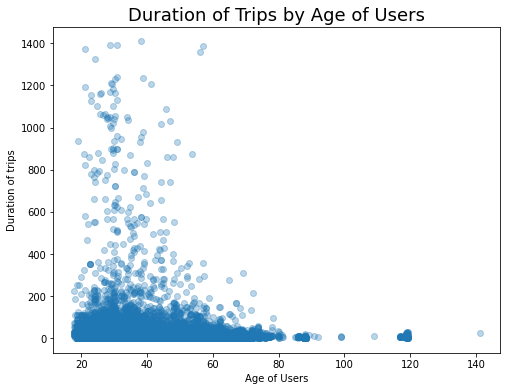

In [503]:
# Setting figure size
plt.figure(figsize=(8, 6))

# Plotting the scatterplot
sb.regplot(data = bike_data, x = 'age', y = 'duration_min', fit_reg =False,
           truncate = False, x_jitter = 0.3, scatter_kws = {'alpha':0.3})
plt.xlabel('Age of Users')
plt.ylabel('Duration of trips')
plt.title('Duration of Trips by Age of Users', fontsize = 18);

### Observation:
- Irrespective of the age of users, most of the trips are below 200 minutes. Trips with durations higher than 200 minutes are only found among members between the ages of 18 and 60 years.

### Question 3: What is the average ride time(minutes) per day?

### Visualization

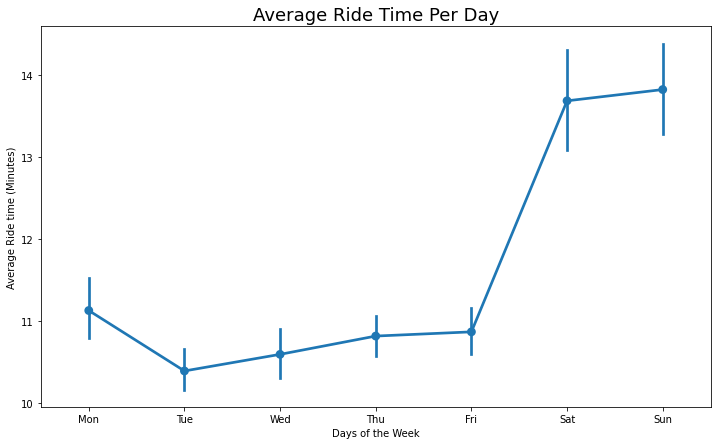

In [504]:
# Setting the figure size
plt.figure(figsize = (12, 7))

# Plotting the chart
sb.pointplot(data = bike_data, x = 'Day_of_week', y = 'duration_min', order=day_order)
plt.title('Average Ride Time Per Day', fontsize = 18);
plt.ylabel('Average Ride time (Minutes)');
plt.xlabel('Days of the Week');

### Observation:
- It was observed that weekends (Saturdays and Sundays) have the highest average ride per day.

### Question 4: What is the average ride time(minutes) for different genders?

In [505]:
# Calculating the average ride time by gender
bike_data.groupby('member_gender')['duration_min'].mean()

member_gender
Female    12.491284
Male      10.719061
Other     16.120756
Name: duration_min, dtype: float64

### Visualization

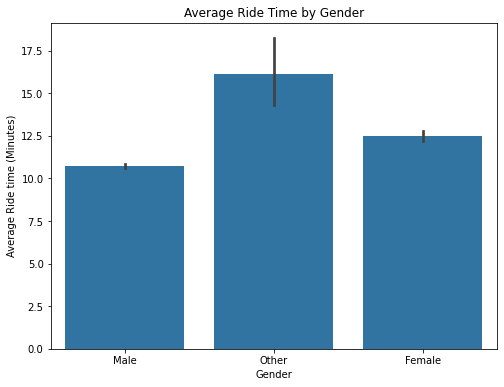

In [506]:
# Setting the figure size
plt.figure(figsize = (8,6))

# Plotting the barplot
sb.barplot(data=bike_data, x='member_gender', y='duration_min',color= base_color)
plt.xlabel('Gender')
plt.ylabel('Average Ride time (Minutes)')
plt.title('Average Ride Time by Gender');

### Observation: 
- The Other gender has the highest average ride time with 16.1 minutes.
- Females with an average ride time of 12.5 minutes while the males averaged 10.7 minutes.

### Question 5: What is the average ride time(minutes) for Users?

In [507]:
bike_data.groupby('user_type')['duration_min'].mean(())

user_type
Customer      21.340148
Subscriber    10.185817
Name: duration_min, dtype: float64

### Visualization

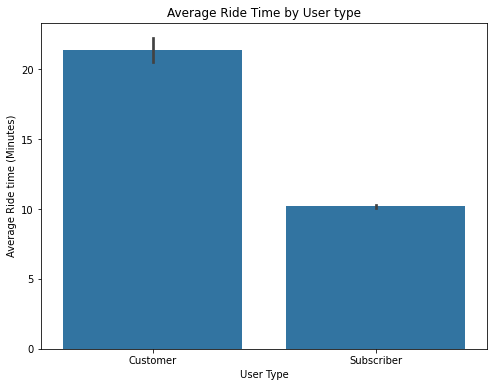

In [508]:
# Setting the figure size
plt.figure(figsize = (8,6))

# Plotting the barplot
sb.barplot(data=bike_data, x='user_type', y='duration_min',color= base_color)
plt.xlabel('User Type')
plt.ylabel('Average Ride time (Minutes)')
plt.title('Average Ride Time by User type');

### Observations:
- Customers have an average ride time of 21 minutes while the subscribers averaged 10 minutes.

### Question 6: What is the average ride time(minutes) for users that shared their bike for trips?

In [509]:
bike_data.groupby('bike_share_for_all_trip')['duration_min'].mean()

bike_share_for_all_trip
No     11.281726
Yes    10.910882
Name: duration_min, dtype: float64

### Visualization

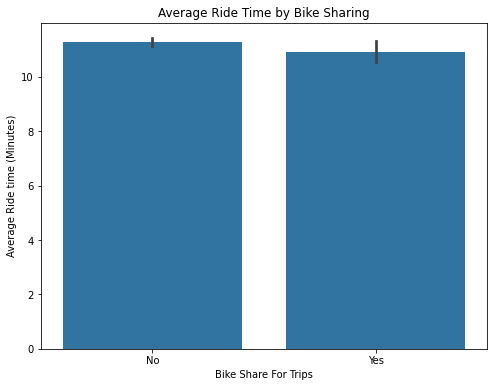

In [510]:
# Setting the figure size
plt.figure(figsize = (8,6))

# Plotting the barplot
sb.barplot(data=bike_data, x='bike_share_for_all_trip', y='duration_min',color= base_color)
plt.xlabel('Bike Share For Trips')
plt.ylabel('Average Ride time (Minutes)')
plt.title('Average Ride Time by Bike Sharing');

### Observation:
- Those that didn't share bike had an average ride time of 11.9 minutes while others averaged about 11 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

><br> 1. The duration of rides was explored in respect to other variables such as user types, member gender, days of the week and even the age of riders.</br>
><br>2. Weekends generally had an higher average ride time than the weekdays.</br> 
><br>3. But has the highest number trips taken were on Thursdays for both customers and subscribers. </br>
><br>4. Customers had an higher average ride time than subscribers.</br>
><br>5. No unusual points were noticed.</br>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The total number of trip taken for customers were relatively low compared to Subscribers.

## Multiivariate Exploration
> **In this section, we'll investigate how the variation of two or more variables and how they affect one another.**

### Question 1: What is the average ride time(minutes) of users per day?

### Visualization

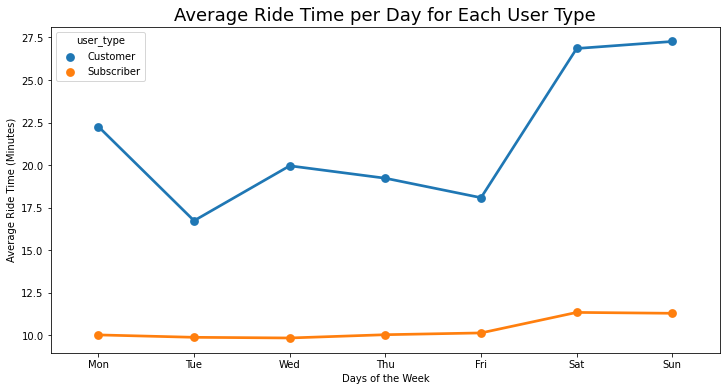

In [511]:
# Setting the figure size
plt.figure(figsize=(12,6))

# plotting the pointplot
sb.pointplot(data=bike_data, x='Day_of_week', y='duration_min', order=day_order, hue = "user_type", ci=None)
plt.xlabel('Days of the Week')
plt.ylabel('Average Ride Time (Minutes)')
plt.title("Average Ride Time per Day for Each User Type", fontsize = 18);

### Observation
- Genrally, Customers have a higher average ride time compared to Subscribers. It can be observed that both customers and subscribers have higher average ride time on Weekends (Saturdays and Sundays).

### Question 2: What is the users total number of trips by gender?

### Visualization

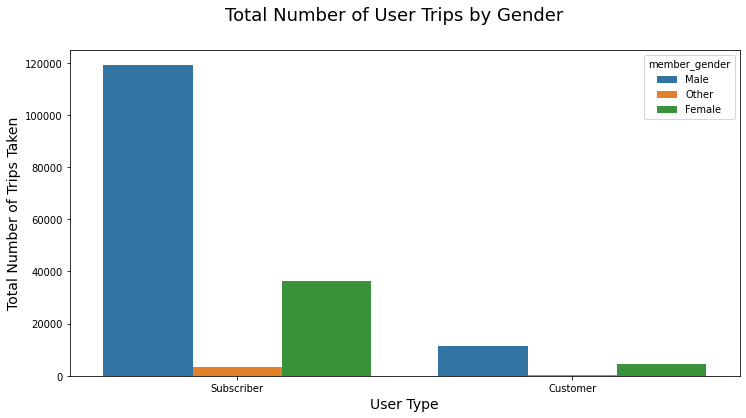

In [512]:
# Counting the number of trips taken by users
user_count_order = bike_data['user_type'].value_counts().index

# Setting the figure size
plt.figure(figsize = (12,6))

# Plotting the bars
user_plot = sb.countplot(data = bike_data, x = 'user_type', hue = 'member_gender', order = user_count_order )
# Setting the plot axis labels
user_plot.set_xlabel('User Type', fontsize = 14)
user_plot.set_ylabel('Total Number of Trips Taken', fontsize = 14)

# Setting the plot title
plt.suptitle('Total Number of User Trips by Gender', fontsize=18);

### Observation:
- For both the Subscriber and Customer user type, the Male riders had the highest number of trips taken.

### Question 3: What is the hourly duration of rides by different user type?

### Visualization

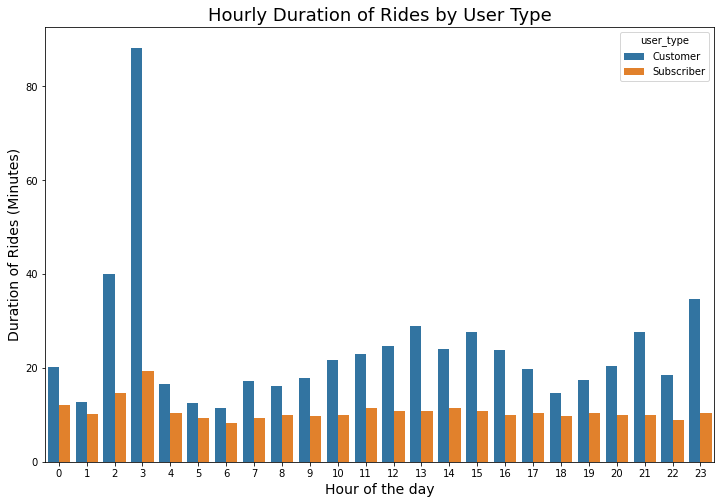

In [513]:
# Setting the figure size
plt.figure(figsize=(12,8))

# Plotting the bar
sb.barplot(data=bike_data, x='time', y='duration_min', order = hour_order, ci=None, hue='user_type')
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('Duration of Rides (Minutes)', fontsize=14)
plt.title('Hourly Duration of Rides by User Type', fontsize = 18);

### Observation:
- Suprisingly, it was observed that both consumers and subscribers took their longest trips at 3AM in the morning.

### Question 4: What is the relationship between age and duration for bike sharing options?

### Visualization

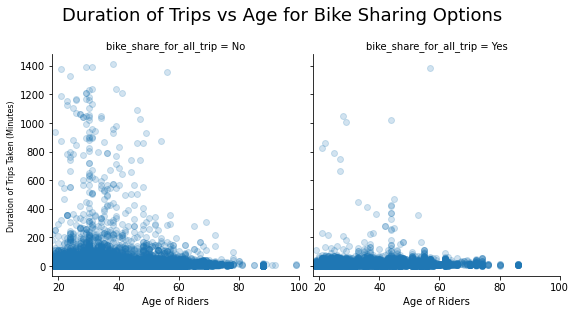

In [514]:
# Plotting the Scatterplot with FacetGrid
g = sb.FacetGrid(data=bike_data, col='bike_share_for_all_trip', height=4)
g.map(plt.scatter, 'age', 'duration_min', alpha=0.2)
g.set(xlim=(18,100))
g.set_xlabels('Age of Riders', fontsize = 10)
g.set_ylabels('Duration of Trips Taken (Minutes)', fontsize = 8)

# Setting the plot title
plt.suptitle('Duration of Trips vs Age for Bike Sharing Options', y = 1.08, fontsize=18);

### Observation:
- For both bike sharing options, the riders below the age of 80 recorded longer duration of rides. 
- The riders with no bike share had spent more time on their trips than the ones with bike share.

### Question 5: How does the user type and gender affect the duration of rides?

### Visualization

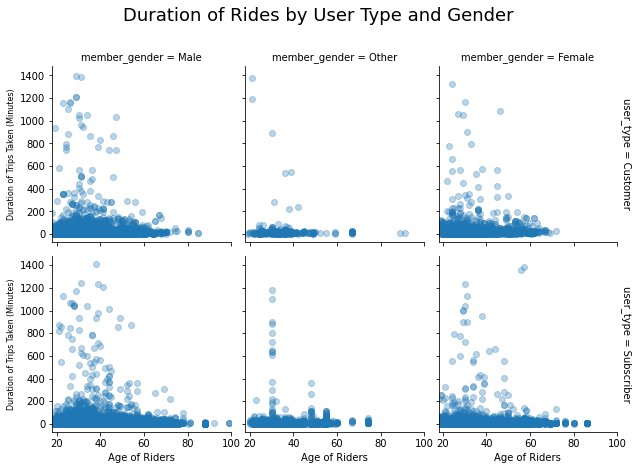

In [515]:
# Plotting the scatterplot with a FacetGrid
g = sb.FacetGrid(data = bike_data, col = 'member_gender', row = 'user_type', margin_titles = True)
g.map(plt.scatter, 'age', 'duration_min', alpha = 0.3)
g.set(xlim=(18,100))
g.set_xlabels('Age of Riders', fontsize = 10)
g.set_ylabels('Duration of Trips Taken (Minutes)', fontsize = 8)

# Setting the plot title
plt.suptitle('Duration of Rides by User Type and Gender', y = 1.08, fontsize=18);

### Observation:
- It can be observed that the riders below the age of 60 had the longest duration of rides across all gender and user types.

### Question 6: What is the average age riders by gender and user type?

In [516]:
bike_data.groupby(['member_gender', 'bike_share_for_all_trip']).mean()['age']


member_gender  bike_share_for_all_trip
Female         No                         33.280797
               Yes                        32.562222
Male           No                         34.693211
               Yes                        32.285562
Other          No                         35.810253
               Yes                        36.197531
Name: age, dtype: float64

### Visualization

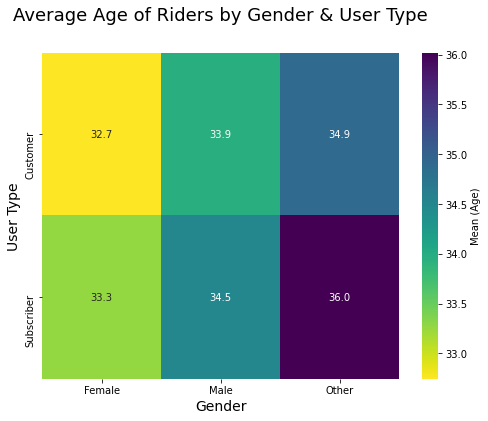

In [517]:
# Calculating the average age by gender and user_type
age_avg = bike_data.groupby(['member_gender', 'user_type']).mean()['age']

# Resetting the average age as index
age_avg = age_avg.reset_index(name= 'Age_Average')

# Converting the calculated average intto a dataframe
age_avg = age_avg.pivot(index = 'user_type', columns = 'member_gender', values = 'Age_Average')

# Setting the figure size
plt.figure(figsize=(8,6))

# Plotting the Heatmap
ax = sb.heatmap(age_avg, annot = True, fmt = '.1f', cmap = 'viridis_r', cbar_kws = {'label' : 'Mean (Age)'})
ax.set_xlabel('Gender', fontsize = 14)
ax.set_ylabel('User Type', fontsize = 14)
ax.set_title('Average Age of Riders by Gender & User Type', y = 1.08, fontsize = 18);

### Observation:
- For the both Customers and Subscribers, the other gender had the oldest riders with an average age of 34.9 and 36 respectfully.
- Also, the female riders had youngest riders for both user types.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
><br> The distribution of ride duration vs riders age were investigated especially in respect to user type, gender and bike sharing option.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the investigation of hourly duration of rides by user types, it was observed that hourly duration of rides for customers were very high at 3AM!

## Conclusions
<br>1. Riders in the age group of 25 - 40 had the highest number of trips taken.</br>
<br>2. About 75% of the riders are Males.</br>
<br>3. 90% of the riders are Subscribers.</br>
<br>4. Most of the trips taken only lasted for about 5 - 12.5 minutes.</br>
<br>5. Thursdays have the highest number of trips.</br>
<br>6. Subscriber completes at least thrice the number of Customers rides daily.</br>
<br>7. Weekends have lesser number of trips, therefore it records higher average ride time compared to weekdays.</br>
<br>8. The average ride time for riders who shared bikes and those that didn't was almost the same.</br>
<br>9. The average age of Female subcribers is 33.3 and for female customer is 32.7.</br>
<br>10. The average age of male subscribers is 34.5 while for male customers is 33.9.</br>
<br>11. The average age of subscribers of the other gender is 36 while for those that are customers is 34.9.</br>